In [ ]:
#understanding dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('test_Dataset1.csv')

# Initial examination
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types and missing values:")
print(df.info())

Dataset shape: (59465, 10)

First 5 rows:
   step      customer age gender zipcodeOri      merchant zipMerchant  \
0    26   C746862122'  3'     M'     28007'   M348934600'      28007'   
1   146  C1760492708'  1'     F'     28007'  M1823072687'      28007'   
2   172  C1984083185'  3'     F'     28007'  M1823072687'      28007'   
3     9  C1530262146'  2'     M'     28007'  M1823072687'      28007'   
4    19  C1471216995'  3'     F'     28007'   M348934600'      28007'   

             category  amount  fraud  
0  es_transportation'   11.65      0  
1  es_transportation'    1.60      0  
2  es_transportation'   33.36      0  
3  es_transportation'    8.01      0  
4  es_transportation'   38.11      0  

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59465 entries, 0 to 59464
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   step         59465 non-null  int64  
 1   customer     

In [ ]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Examine unique values in categorical columns
cat_cols = ['gender', 'zipcodeOri', 'zipMerchant', 'category']
for col in cat_cols:
    print(f"\nUnique values in {col}: {df[col].nunique()}")
    print(df[col].value_counts().head())


Missing values per column:
step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

Number of duplicate rows: 0

Unique values in gender: 4
gender
F'    32475
M'    26818
E'      121
U'       51
Name: count, dtype: int64

Unique values in zipcodeOri: 1
zipcodeOri
28007'    59465
Name: count, dtype: int64

Unique values in zipMerchant: 1
zipMerchant
28007'    59465
Name: count, dtype: int64

Unique values in category: 15
category
es_transportation'       50545
es_food'                  2692
es_health'                1552
es_wellnessandbeauty'     1489
es_fashion'                651
Name: count, dtype: int64


In [ ]:
# Check exact count of missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64


In [ ]:
# Identify the row(s) with missing values
missing_rows = df[df.isnull().any(axis=1)]
print("\nRows with missing values:")
print(missing_rows)

# Drop the row with missing merchant info (index 51539)
df = df.dropna(subset=['merchant'])

# Verify
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Rows with missing values:
Empty DataFrame
Columns: [step, customer, age, gender, zipcodeOri, merchant, zipMerchant, category, amount, fraud]
Index: []

Missing values after cleaning:
step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64


In [ ]:
print("\nUnique age values:", df['age'].unique())
# Shows: ['1' '3' '5' '2' '4' '6' 'U' '0']


Unique age values: ["3'" "1'" "2'" "5'" "4'" "6'" "0'" "U'"]


In [ ]:
# Replace 'U' with NaN
df['age'] = df['age'].replace('U', np.nan)

# Remove any extra quotes from string values
df['age'] = df['age'].astype(str).str.strip("'").str.strip('"')

# Convert to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Replace 0 with median
age_median = df['age'][df['age'] != 0].median()
df['age'] = df['age'].replace(0, age_median)

# Fill remaining missing values
df['age'] = df['age'].fillna(age_median)

# Verify
print("\nAge distribution after cleaning:")
print(df['age'].value_counts().sort_index())



Age distribution after cleaning:
age
1.0     5747
2.0    18885
3.0    14996
4.0    10957
5.0     6177
6.0     2703
Name: count, dtype: int64


In [ ]:
# Remove quotes from all string columns
str_cols = ['customer', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant', 'category']
for col in str_cols:
    df[col] = df[col].str.strip("'")

# Verify
print("\nSample after quote removal:")
print(df.head())


Sample after quote removal:
   step     customer  age gender zipcodeOri     merchant zipMerchant  \
0    26   C746862122  3.0      M      28007   M348934600       28007   
1   146  C1760492708  1.0      F      28007  M1823072687       28007   
2   172  C1984083185  3.0      F      28007  M1823072687       28007   
3     9  C1530262146  2.0      M      28007  M1823072687       28007   
4    19  C1471216995  3.0      F      28007   M348934600       28007   

            category  amount  fraud  
0  es_transportation   11.65      0  
1  es_transportation    1.60      0  
2  es_transportation   33.36      0  
3  es_transportation    8.01      0  
4  es_transportation   38.11      0  


In [ ]:
# Gender distribution
print("\nGender distribution:")
print(df['gender'].value_counts())

# Zip codes
print("\nOrigin zip codes:")
print(df['zipcodeOri'].value_counts().head())
print("\nMerchant zip codes:")
print(df['zipMerchant'].value_counts().head())

# Categories
print("\nTransaction categories:")
print(df['category'].value_counts())


Gender distribution:
gender
F    32475
M    26818
E      121
U       51
Name: count, dtype: int64

Origin zip codes:
zipcodeOri
28007    59465
Name: count, dtype: int64

Merchant zip codes:
zipMerchant
28007    59465
Name: count, dtype: int64

Transaction categories:
category
es_transportation        50545
es_food                   2692
es_health                 1552
es_wellnessandbeauty      1489
es_fashion                 651
es_hyper                   648
es_barsandrestaurants      572
es_sportsandtoys           403
es_tech                    227
es_home                    217
es_hotelservices           180
es_otherservices            96
es_contents                 88
es_travel                   62
es_leisure                  43
Name: count, dtype: int64


In [ ]:
# Remove 'es_' prefix and clean category names
df['category'] = df['category'].str.replace('es_', '')

# Further clean specific categories
category_mapping = {
    'barsandrestaurants': 'dining',
    'wellnessandbeauty': 'wellness',
    'sportsandtoys': 'sports'
}
df['category'] = df['category'].replace(category_mapping)

print("\nCleaned categories:")
print(df['category'].value_counts())


Cleaned categories:
category
transportation    50545
food               2692
health             1552
wellness           1489
fashion             651
hyper               648
dining              572
sports              403
tech                227
home                217
hotelservices       180
otherservices        96
contents             88
travel               62
leisure              43
Name: count, dtype: int64


In [ ]:
print("\nUnique customers:", df['customer'].nunique())
print("Unique merchants:", df['merchant'].nunique())

# Solution: Hash to numerical values
df['customer_id'] = df['customer'].apply(lambda x: hash(x) % 10000)
df['merchant_id'] = df['merchant'].apply(lambda x: hash(x) % 10000)

# Drop original columns
df = df.drop(['customer', 'merchant'], axis=1)


Unique customers: 4071
Unique merchants: 49


In [ ]:
X = df.drop('fraud', axis=1)
y = df['fraud']


In [ ]:
# Check data types
print("\nFinal data types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Verify fraud class distribution
print("\nFraud distribution:")
print(df['fraud'].value_counts(normalize=True))

# Save cleaned data
df.to_csv('cleaned_fraud_data.csv', index=False)
print("\nCleaned data saved successfully!")


Final data types:
step             int64
age            float64
gender          object
zipcodeOri      object
zipMerchant     object
category        object
amount         float64
fraud            int64
customer_id      int64
merchant_id      int64
dtype: object

Missing values:
step           0
age            0
gender         0
zipcodeOri     0
zipMerchant    0
category       0
amount         0
fraud          0
customer_id    0
merchant_id    0
dtype: int64

Fraud distribution:
fraud
0    0.988094
1    0.011906
Name: proportion, dtype: float64

Cleaned data saved successfully!


In [ ]:
print(df.head())


   step  age gender zipcodeOri zipMerchant        category  amount  fraud  \
0    26  3.0      M      28007       28007  transportation   11.65      0   
1   146  1.0      F      28007       28007  transportation    1.60      0   
2   172  3.0      F      28007       28007  transportation   33.36      0   
3     9  2.0      M      28007       28007  transportation    8.01      0   
4    19  3.0      F      28007       28007  transportation   38.11      0   

   customer_id  merchant_id  
0         4637         4633  
1         9479         8065  
2         3838         8065  
3         9739         8065  
4         6980         4633  


Advanced Data Analysis & Visualization

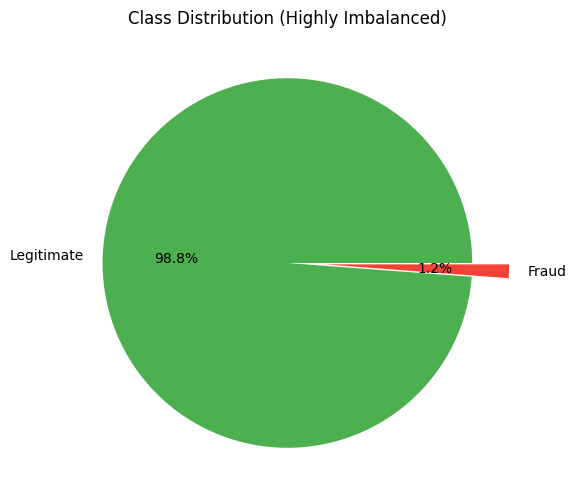

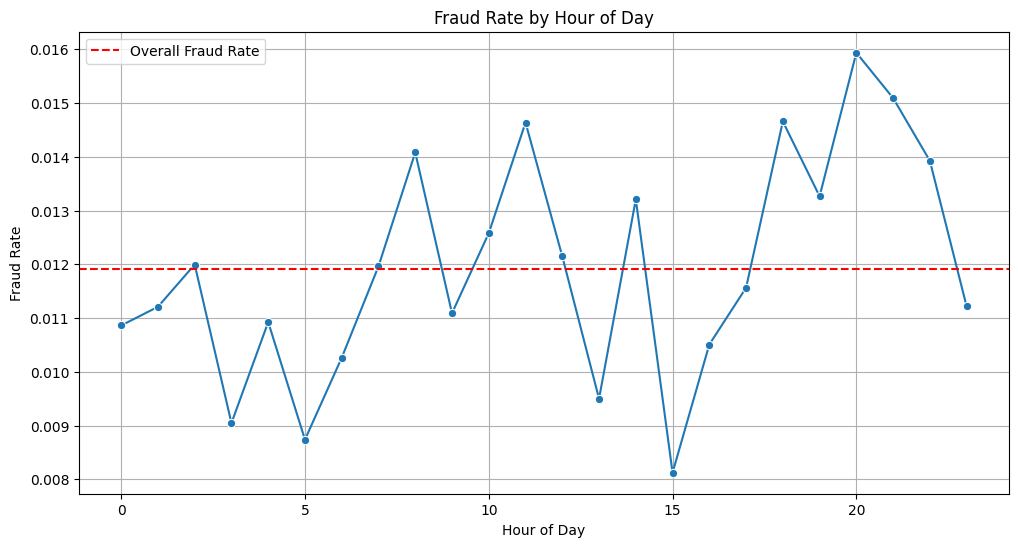

/tmp/ipython-input-15-3118426085.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_category.values, y=fraud_by_category.index, palette='viridis')


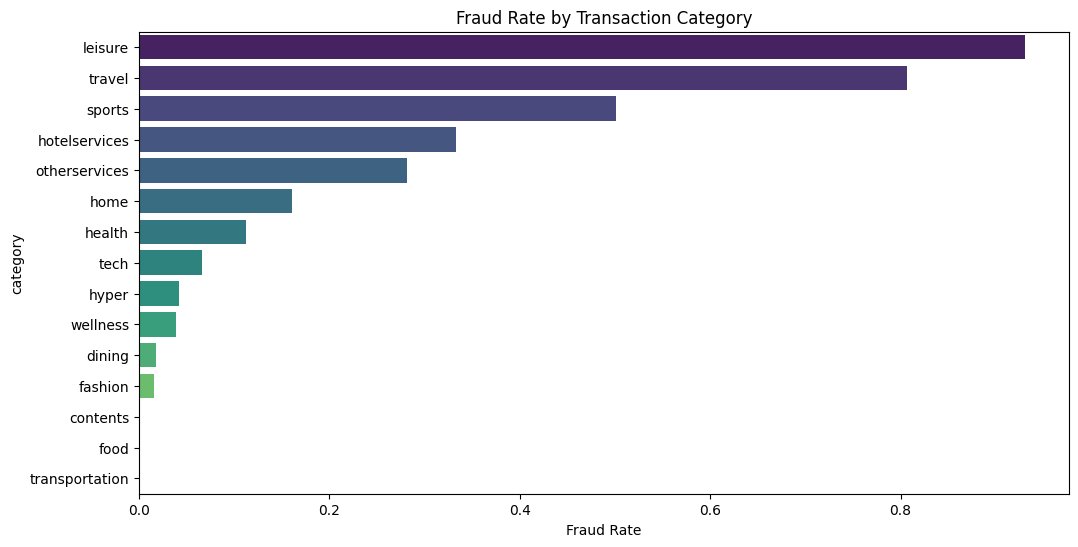

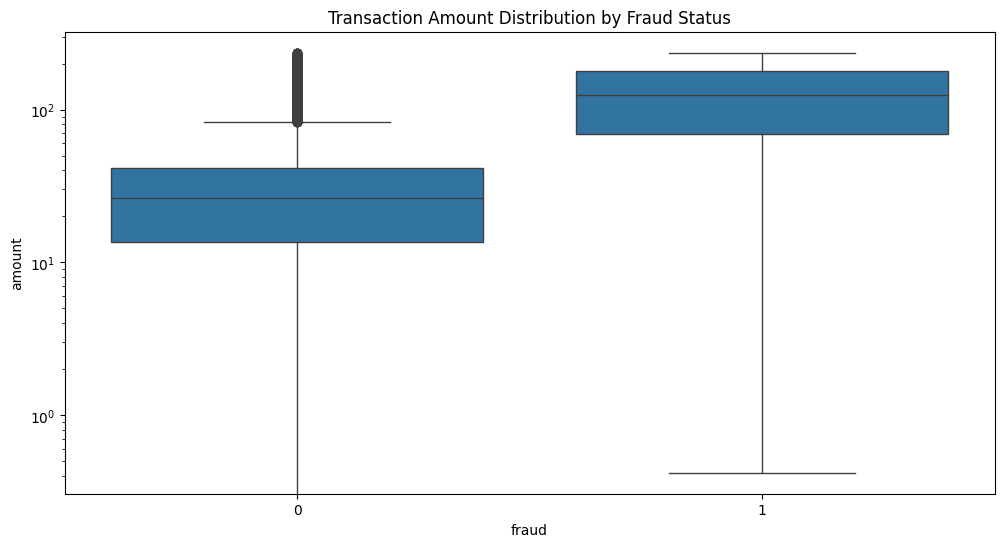

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler
import networkx as nx

# Load cleaned data
df = pd.read_csv('cleaned_fraud_data.csv')

# 1. Fraud Distribution Analysis
plt.figure(figsize=(10, 6))
fraud_counts = df['fraud'].value_counts()
plt.pie(fraud_counts, labels=['Legitimate', 'Fraud'], autopct='%1.1f%%',
        colors=['#4CAF50', '#F44336'], explode=(0, 0.2))
plt.title('Class Distribution (Highly Imbalanced)')
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Temporal Analysis
plt.figure(figsize=(12, 6))
df['hour'] = df['step'] % 24
fraud_by_hour = df.groupby('hour')['fraud'].mean()
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, marker='o')
plt.axhline(y=df['fraud'].mean(), color='r', linestyle='--', label='Overall Fraud Rate')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.legend()
plt.grid(True)
plt.savefig('fraud_by_hour.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Category Analysis
plt.figure(figsize=(12, 6))
fraud_by_category = df.groupby('category')['fraud'].mean().sort_values(ascending=False)
sns.barplot(x=fraud_by_category.values, y=fraud_by_category.index, palette='viridis')
plt.title('Fraud Rate by Transaction Category')
plt.xlabel('Fraud Rate')
plt.savefig('fraud_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Amount Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='fraud', y='amount', data=df[df['amount'] < df['amount'].quantile(0.99)])
plt.yscale('log')
plt.title('Transaction Amount Distribution by Fraud Status')
plt.savefig('amount_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

 Quantum-Inspired Feature Engineering

In [ ]:
# Quantum-inspired feature transformations
def quantum_inspired_features(df):
    # 1. Quantum Amplitude Encoding (simulated)
    df['amount_quantum'] = np.arcsin(df['amount'] / df['amount'].max())

    # 2. Entanglement-inspired features
    df['entangled_feature'] = np.sin(df['amount'] * df['age'] / 100)

    # 3. Superposition state features
    df['superposition_feature'] = np.where(
        (df['hour'] > 20) | (df['hour'] < 6),
        np.cos(df['amount']),
        np.sin(df['amount'])
    )

    # 4. Quantum interference pattern
    df['interference_pattern'] = np.sin(df['amount'])**2 + np.cos(df['age'])**2

    return df

df = quantum_inspired_features(df)

# Customer behavior features
def customer_behavior_features(df):
    # Customer transaction statistics
    customer_stats = df.groupby('customer_id').agg({
        'amount': ['mean', 'std', 'max', 'min'],
        'fraud': 'sum'
    })
    customer_stats.columns = ['cust_avg_amount', 'cust_std_amount',
                            'cust_max_amount', 'cust_min_amount', 'cust_fraud_count']

    # Merchant risk profiles
    merchant_stats = df.groupby('merchant_id').agg({
        'amount': ['mean', 'std'],
        'fraud': 'mean'
    })
    merchant_stats.columns = ['merch_avg_amount', 'merch_std_amount', 'merch_fraud_rate']

    # Merge features
    df = df.merge(customer_stats, on='customer_id', how='left')
    df = df.merge(merchant_stats, on='merchant_id', how='left')

    # Relative features
    df['amount_vs_cust_avg'] = df['amount'] / df['cust_avg_amount']
    df['amount_vs_merch_avg'] = df['amount'] / df['merch_avg_amount']

    return df

df = customer_behavior_features(df)

# Temporal features
df['is_weekend'] = ((df['step'] // 24) % 7 >= 5).astype(int)
df['time_since_last_txn'] = df.groupby('customer_id')['step'].diff().fillna(0)

In [ ]:
X.isnull().sum()[X.isnull().sum() > 0]

,0


In [ ]:
X = X.fillna(0)


In [ ]:
print("Remaining NaNs after fix:", X.isnull().sum().sum())  # ✅ should be 0


Remaining NaNs after fix: 0


/tmp/ipython-input-20-511014136.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mi_score', y='feature', data=mi_df.head(15), palette='viridis')


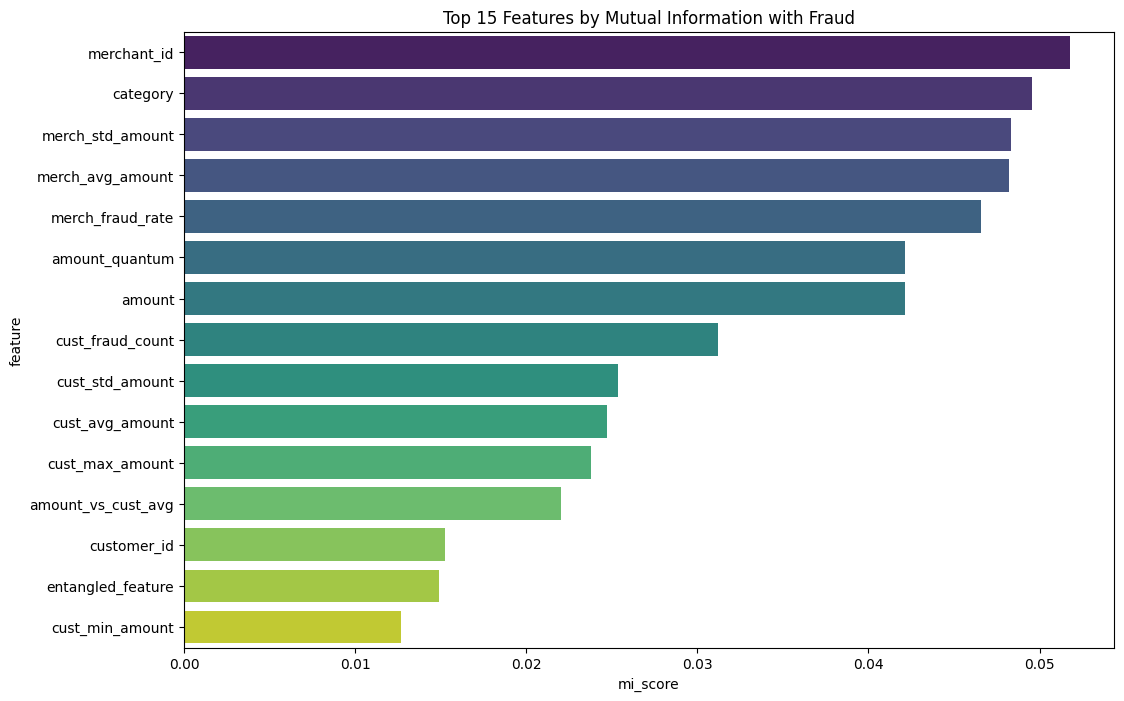

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Encode categoricals
cat_cols = ['gender', 'category']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Drop non-feature columns
X = df.drop(['fraud', 'zipcodeOri', 'zipMerchant'], axis=1)
y = df['fraud']

# ✅ Fix: Fill remaining NaNs in this new X
X = X.fillna(0)

# Run mutual info
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_df = pd.DataFrame({'feature': X.columns, 'mi_score': mi_scores})
mi_df = mi_df.sort_values('mi_score', ascending=False)

# Plot top 15
plt.figure(figsize=(12, 8))
sns.barplot(x='mi_score', y='feature', data=mi_df.head(15), palette='viridis')
plt.title('Top 15 Features by Mutual Information with Fraud')
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Select top 20 and scale
selected_features = mi_df.head(20)['feature'].tolist()
X_selected = X[selected_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)


Text(0.5, 1.0, 'Feature Correlation Matrix')

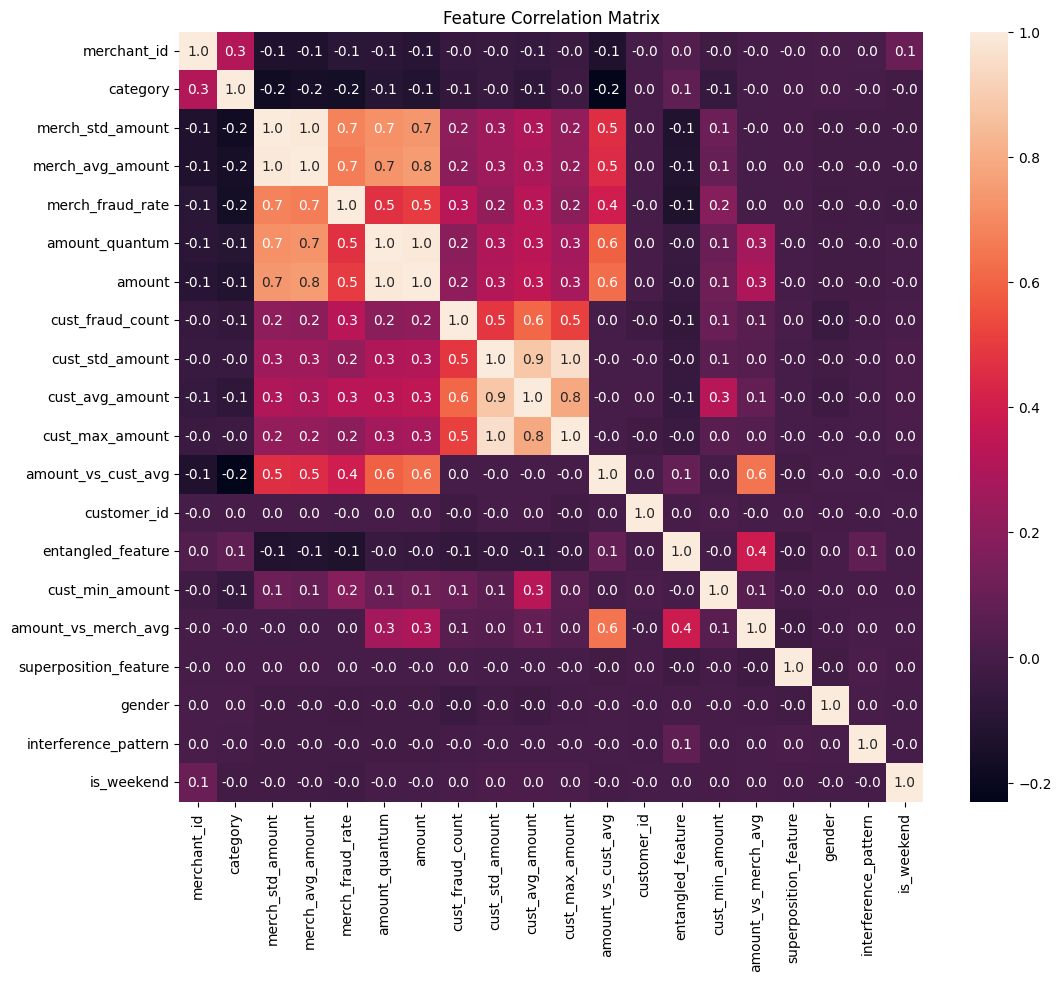

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(X_selected.corr(), annot=True, fmt=".1f")
plt.title('Feature Correlation Matrix')

In [ ]:
print(f"Number of features (columns): {X.shape[1]}")
print(f"Feature names:\n{X.columns.tolist()}")


Number of features (columns): 24
Feature names:
['step', 'age', 'gender', 'category', 'amount', 'customer_id', 'merchant_id', 'hour', 'amount_quantum', 'entangled_feature', 'superposition_feature', 'interference_pattern', 'cust_avg_amount', 'cust_std_amount', 'cust_max_amount', 'cust_min_amount', 'cust_fraud_count', 'merch_avg_amount', 'merch_std_amount', 'merch_fraud_rate', 'amount_vs_cust_avg', 'amount_vs_merch_avg', 'is_weekend', 'time_since_last_txn']


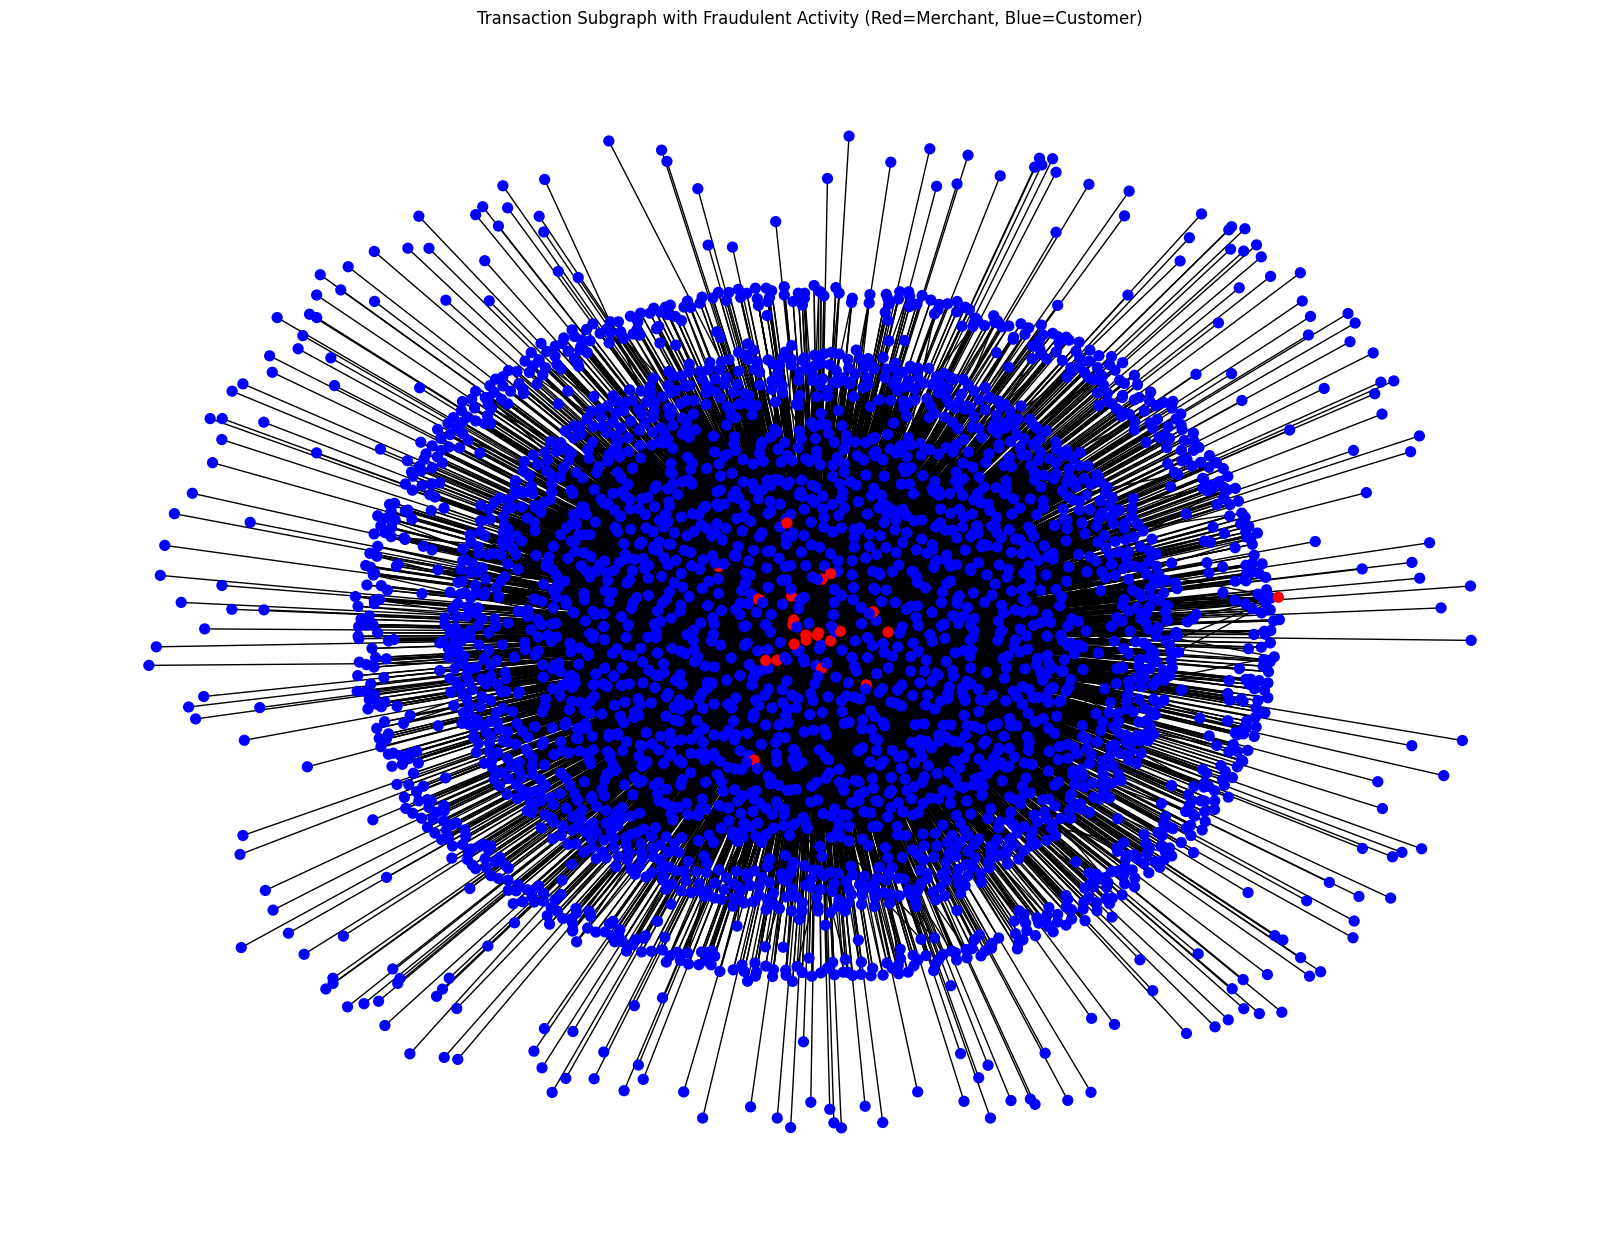

In [ ]:
# Build transaction graph
G = nx.Graph()

# Add nodes (customers and merchants)
customers = df['customer_id'].unique()
merchants = df['merchant_id'].unique()

G.add_nodes_from(customers, node_type='customer')
G.add_nodes_from(merchants, node_type='merchant')

# Add edges (transactions)
for _, row in df.iterrows():
    G.add_edge(row['customer_id'], row['merchant_id'],
              amount=row['amount'], fraud=row['fraud'])

# Calculate graph metrics
betweenness = nx.betweenness_centrality(G)
pagerank = nx.pagerank(G)

# Add graph features to dataframe
df['betweenness_centrality'] = df['customer_id'].map(betweenness)
df['pagerank'] = df['customer_id'].map(pagerank)

# Visualize a subgraph (for presentation)
plt.figure(figsize=(16, 12))
subgraph = nx.ego_graph(G, df[df['fraud'] == 1]['customer_id'].iloc[0], radius=2)
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, node_size=50, with_labels=False,
        node_color=['red' if subgraph.nodes[n]['node_type'] == 'merchant' else 'blue' for n in subgraph.nodes])
plt.title('Transaction Subgraph with Fraudulent Activity (Red=Merchant, Blue=Customer)')
plt.savefig('transaction_graph.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Compute fraud rate per customer
fraud_rates = df.groupby('customer_id')['fraud'].mean()

# Combine with graph features
graph_features = df[['customer_id', 'betweenness_centrality', 'pagerank']].drop_duplicates()
graph_features['fraud_rate'] = graph_features['customer_id'].map(fraud_rates)

# Top 5 by Pagerank
top_pagerank = graph_features.sort_values('pagerank', ascending=False).head(5)
print("Top 5 Customers by PageRank:")
print(top_pagerank[['customer_id', 'pagerank', 'fraud_rate']])

# Top 5 by Betweenness Centrality
top_betweenness = graph_features.sort_values('betweenness_centrality', ascending=False).head(5)
print("\nTop 5 Customers by Betweenness Centrality:")
print(top_betweenness[['customer_id', 'betweenness_centrality', 'fraud_rate']])


Top 5 Customers by PageRank:
       customer_id  pagerank  fraud_rate
2398          8114  0.018946    0.000000
1725          9281  0.010302    0.000000
3848          2525  0.009197    0.083333
2175           688  0.005354    0.000000
15938         3089  0.004927    0.000000

Top 5 Customers by Betweenness Centrality:
       customer_id  betweenness_centrality  fraud_rate
1725          9281                0.023663    0.000000
2398          8114                0.011881    0.000000
15938         3089                0.007054    0.000000
2726          2579                0.006236    0.000000
3848          2525                0.003434    0.083333


In [ ]:
# Merge graph features into your selected feature set
X['betweenness_centrality'] = df['betweenness_centrality']
X['pagerank'] = df['pagerank']

# Update selected features list
if 'betweenness_centrality' not in selected_features:
    selected_features += ['betweenness_centrality', 'pagerank']

# Re-scale with added features
X_selected = X[selected_features]
X_scaled = scaler.fit_transform(X_selected)


1301/1301 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Precision: 0.9507
Recall: 0.9104
F1 Score: 0.9301
AUC-ROC: 0.9928


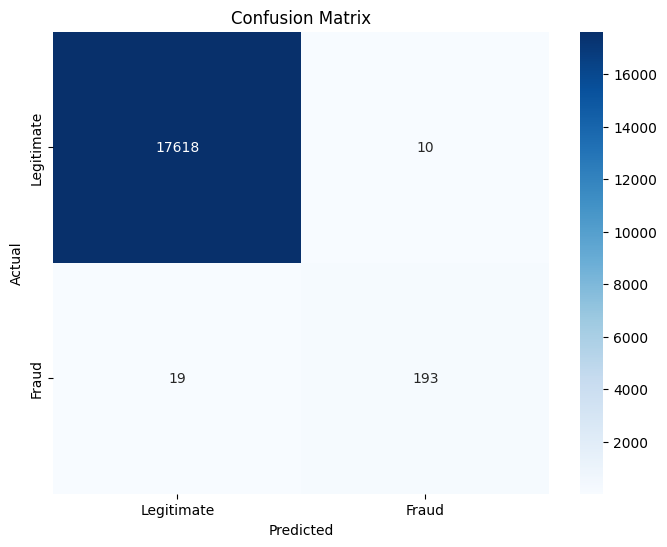

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from lightgbm import LGBMClassifier
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# 1. Quantum-Inspired Autoencoder for Anomaly Detection
input_dim = X_train.shape[1]
encoding_dim = 8

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='tanh')(input_layer)
decoder = Dense(input_dim, activation='linear')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

history = autoencoder.fit(X_train[y_train == 0], X_train[y_train == 0],
                         epochs=50, batch_size=256,
                         validation_data=(X_test[y_test == 0], X_test[y_test == 0]),
                         verbose=0)

# Get reconstruction errors
train_recon = np.mean(np.square(X_train - autoencoder.predict(X_train)), axis=1)
test_recon = np.mean(np.square(X_test - autoencoder.predict(X_test)), axis=1)

# 2. Graph-Based Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(df[['betweenness_centrality', 'pagerank']])
iso_scores = iso_forest.decision_function(df[['betweenness_centrality', 'pagerank']])

# 3. Quantum-Inspired Gradient Boosting
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'dart',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1
}

lgbm = LGBMClassifier(**params)
lgbm.fit(X_train, y_train)

# Ensemble predictions
train_features = np.column_stack([
    lgbm.predict_proba(X_train)[:, 1],
    train_recon,
    iso_scores[:len(X_train)]
])

test_features = np.column_stack([
    lgbm.predict_proba(X_test)[:, 1],
    test_recon,
    iso_scores[len(X_train):len(X_train)+len(X_test)]
])

# Final meta-model
meta_model = LGBMClassifier(**params)
meta_model.fit(train_features, y_train)

# Evaluation
y_pred = meta_model.predict(test_features)
y_proba = meta_model.predict_proba(test_features)[:, 1]

print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Create submission DataFrame (for evaluation, not actual test)
submission = pd.DataFrame({
    'is_fraud_predicted': y_pred,
    'fraud_probability': y_proba
})
submission.to_csv('prediction.csv', index=False)
print("✅ prediction.csv saved with test predictions.")



✅ prediction.csv saved with test predictions.
